In [1]:
from mdp import *
from utils import *

In [2]:
gridmdp = GridMDP([[-0.04, -0.04, -0.04, +1],
                   [-0.04, None, -0.04, -1],
                   [-0.04, -0.04, -0.04, -0.04]],
                   terminals=[(3, 2), (3, 1)])

In [6]:
pi = best_policy(gridmdp, value_iteration(gridmdp, .01))
gridmdp.to_arrows(pi)

[['>', '>', '>', '.'], ['^', None, '^', '.'], ['^', '>', '^', '<']]

In [7]:
from utils import print_table
print_table(gridmdp.to_arrows(pi))

>   >      >   .
^   None   ^   .
^   >      ^   <


In [8]:
value_iteration(gridmdp)

{(0, 0): 0.2962883154554812,
 (0, 1): 0.3984432178350045,
 (0, 2): 0.5093943765842497,
 (1, 0): 0.25386699846479516,
 (1, 2): 0.649585681261095,
 (2, 0): 0.3447542300124158,
 (2, 1): 0.48644001739269643,
 (2, 2): 0.7953620878466678,
 (3, 0): 0.12987274656746342,
 (3, 1): -1.0,
 (3, 2): 1.0}

{(0, 0): {(-1, 0): [(0.8, (0, 0)), (0.1, (0, 1)), (0.1, (0, 0))],
  (0, -1): [(0.8, (0, 0)), (0.1, (0, 0)), (0.1, (1, 0))],
  (0, 1): [(0.8, (0, 1)), (0.1, (1, 0)), (0.1, (0, 0))],
  (1, 0): [(0.8, (1, 0)), (0.1, (0, 0)), (0.1, (0, 1))]},
 (0, 1): {(-1, 0): [(0.8, (0, 1)), (0.1, (0, 2)), (0.1, (0, 0))],
  (0, -1): [(0.8, (0, 0)), (0.1, (0, 1)), (0.1, (0, 1))],
  (0, 1): [(0.8, (0, 2)), (0.1, (0, 1)), (0.1, (0, 1))],
  (1, 0): [(0.8, (0, 1)), (0.1, (0, 0)), (0.1, (0, 2))]},
 (0, 2): {(-1, 0): [(0.8, (0, 2)), (0.1, (0, 2)), (0.1, (0, 1))],
  (0, -1): [(0.8, (0, 1)), (0.1, (0, 2)), (0.1, (1, 2))],
  (0, 1): [(0.8, (0, 2)), (0.1, (1, 2)), (0.1, (0, 2))],
  (1, 0): [(0.8, (1, 2)), (0.1, (0, 1)), (0.1, (0, 2))]},
 (1, 0): {(-1, 0): [(0.8, (0, 0)), (0.1, (1, 0)), (0.1, (1, 0))],
  (0, -1): [(0.8, (1, 0)), (0.1, (0, 0)), (0.1, (2, 0))],
  (0, 1): [(0.8, (1, 0)), (0.1, (2, 0)), (0.1, (0, 0))],
  (1, 0): [(0.8, (2, 0)), (0.1, (1, 0)), (0.1, (1, 0))]},
 (1, 2): {(-1, 0): [(0.8, (0, 2)), (0.1, (1,

0.2962883154554812
0 0
0.25386699846479516
0 1
0.3447542300124158
0 2
0.12987274656746342
0 3
0.3984432178350045
1 0
nan
1 1
0.48644001739269643
1 2
-1.0
1 3
0.5093943765842497
2 0
0.649585681261095
2 1
0.7953620878466678
2 2
1.0
2 3
[[ 0.29628832  0.253867    0.34475423  0.12987275]
 [ 0.39844322         nan  0.48644002 -1.        ]
 [ 0.50939438  0.64958568  0.79536209  1.        ]]


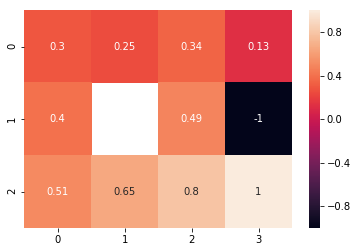

In [43]:
import itertools
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

vi_utility_dict = value_iteration(gridmdp)
vi_utility_array = np.ndarray((3,4))

#for key,value in vi_utility_dict.items():
#    vi_utility_array[key[1],key[0]] = value


    
for r in range(vi_utility_array.shape[1]):
    for c in range(vi_utility_array.shape[0]):
        pass
        
for (r, c) in itertools.product(range(vi_utility_array.shape[0]), range(vi_utility_array.shape[1])):
    vi_utility_array[r,c] = vi_utility_dict.get((c, r), np.NaN)
    print(vi_utility_array[r,c])
    print(r, c)

print(vi_utility_array)
#vi_utility_array[[r],[c]] = vi_utility_dict.get((r, c), -2)

utility_array_df = pd.DataFrame(vi_utility_array)

sns.heatmap(utility_array_df, annot=True)
